# **Import Libraries**

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from category_encoders import LeaveOneOutEncoder
from datetime import datetime
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression

# **🚗 Pemahaman Dataset**

## **📌 Sumber dan Deskripsi Dataset**  

Dataset **"Car Price Prediction"** digunakan untuk memprediksi harga kendaraan berdasarkan berbagai fitur dan karakteristik mobil. Dataset ini berasal dari **Kaggle**, salah satu platform utama untuk dataset dan kompetisi machine learning. 

📥 **Link Dataset**: [Car Price Prediction - Kaggle](https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge)  

### **🔍 Gambaran Umum Dataset:**  
- 📊 **Jumlah Baris**: 19.237 entri  
- 📈 **Jumlah Kolom**: 18 variabel  
- 🎯 **Target**: **"Price"** (harga mobil)  
- 📅 **Rentang Tahun Produksi**: 1939 - 2020  
- 💰 **Rentang Harga**: 1 - 26.307.500 (kemungkinan dalam USD)  
- 📉 **Rata-rata Harga**: 18.555,93  

### **💡 Mengapa dataset ini cocok untuk model regresi?**
✔️ **Variabel target numerik yang jelas** (Price)  
✔️ **Berisi fitur numerik & kategorikal**  
✔️ **Jumlah data cukup besar untuk pelatihan yang baik**  
✔️ **Mewakili berbagai segmen kendaraan dengan rentang harga luas**  

---

### **🔎 Variabel yang Digunakan** 

Dataset ini memiliki **18 kolom** yang mencakup berbagai spesifikasi kendaraan:  

| 🔢 **Variabel** | 🏷 **Tipe Data** | 📝 **Deskripsi** |
|---------------|--------------|----------------|
| 🆔 **ID** | Integer | Nomor identifikasi unik untuk setiap mobil |
| 💵 **Price** | Integer | **Target** - Harga kendaraan |
| 💸 **Levy** | String | Pajak atau biaya terkait kendaraan |
| 🏭 **Manufacturer** | String | Merek mobil (contoh: LEXUS, HONDA, TOYOTA) |
| 🚘 **Model** | String | Model spesifik kendaraan |
| 📅 **Prod. year** | Integer | Tahun produksi mobil (1939-2020) |
| 🚙 **Category** | String | Tipe kendaraan (contoh: Jeep, Sedan, Hatchback) |
| 🛋 **Leather interior** | String | Interior kulit (Yes/No) |
| ⛽ **Fuel type** | String | Jenis bahan bakar (Petrol, Diesel, Hybrid, dll) |
| 🔧 **Engine volume** | String | Volume mesin dalam liter |
| 🏁 **Mileage** | String | Jarak tempuh kendaraan (biasanya dalam km) |
| 🔥 **Cylinders** | Float | Jumlah silinder mesin |
| ⚙️ **Gear box type** | String | Jenis transmisi (Automatic, Manual, dll) |
| 🚀 **Drive wheels** | String | Konfigurasi penggerak roda (4x4, Front, Rear) |
| 🚪 **Doors** | String | Jumlah pintu kendaraan |
| 🛞 **Wheel** | String | Posisi kemudi (Left-wheel, Right-hand drive) |
| 🎨 **Color** | String | Warna kendaraan |
| 🛡 **Airbags** | Integer | Jumlah airbag dalam kendaraan |

---

Dataset ini menawarkan banyak fitur yang dapat digunakan untuk eksplorasi lebih lanjut dan membangun model prediktif yang akurat. 🚀✨

💾 Selanjutnya mari kita lakukan **loading dataset** dan kita simpan kedalam sebuah **dataframe pandas** dengan nama `df`


In [102]:
df = pd.read_csv('data/raw-data/car_price_prediction.csv')

## 📊 **Statistik Deskriptif & Visualisasi Awal** 

Sebelum membangun model prediksi, kita perlu **memahami karakteristik data** melalui analisis statistik dan visualisasi.  

💡 **Apa yang akan kita lakukan?**  
✅ Meninjau distribusi harga mobil dan fitur lainnya  
✅ Menganalisis tren berdasarkan tahun produksi, kategori, dan jenis bahan bakar  
✅ Menggunakan grafik untuk melihat pola tersembunyi dalam data  

🔍 Mari kita jelajahi data ini lebih dalam dengan statistik deskriptif dan visualisasi yang menarik! 🚀📈  

---

### **🎨 Konfigurasi Gaya Visualisasi**  

Sebelum mulai membuat grafik, kita perlu **mengatur gaya visualisasi** agar hasilnya lebih **menarik, konsisten, dan mudah dibaca**.  

In [103]:
# Mengatur style visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

📊 Dengan konfigurasi ini, visualisasi kita akan lebih **informatif dan estetis**! 🚀🎨  

### 🔍 **Beberapa Baris Pertama Dataset**  

Sebelum masuk lebih dalam, mari kita **mengintip isi dataset** untuk memahami struktur dan jenis data yang ada. 👀  

📌 Mari kita lihat bagaimana tampilan awal dataset kita! 📊  

In [104]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4



Dataset ini berisi informasi kendaraan dengan berbagai fitur seperti **merek, model, tahun produksi, jenis bahan bakar, dan harga**. 

Beberapa kolom seperti **Levy dan Mileage** memiliki format angka bercampur string yang perlu dibersihkan.  

Selain itu, dapat kita lihat terdapat fitur kategorikal seperti **Leather Interior, Gear Box Type, dan Drive Wheels**, yang penting untuk eksplorasi lebih lanjut! 🚗📊  

---

### 📂 **Informasi Dasar Dataset**  

Sebelum melangkah lebih jauh, mari kita **mengenal struktur dataset** ini dengan melihat jumlah baris, jumlah kolom, dan tipe data yang digunakan.  

In [105]:
# Informasi Dasar Dataset
print("\nInformasi Dasar Dataset:")
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")
print(f"Ukuran Memory: {df.memory_usage().sum() / 1024**2:.2f} MB")
print("\nTipe Data Masing-masing Kolom:")
display(df.dtypes)


Informasi Dasar Dataset:
Jumlah Baris: 19237
Jumlah Kolom: 18
Ukuran Memory: 2.64 MB

Tipe Data Masing-masing Kolom:


ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

📌 **Mengenal Struktur Data dengan Lebih Dekat!**  

Dataset ini berisi **19.237 baris dan 18 kolom**, dengan ukuran yang cukup ringan (**2.64 MB**).  
Terdapat kombinasi **data numerik** 🧮 (int64, float64) dan **data kategorikal** 🔤 (object).  

🚨 **Tapi ada yang perlu diperhatikan!**  
Beberapa kolom memiliki **tipe data yang kurang sesuai**, sehingga harus kita bersihkan sebelum dianalisis lebih lanjut:  

🔍 **Kolom yang perlu diperbaiki:**  
✅ **Levy** → Harusnya **int/float**, karena pajak dan biaya kendaraan seharusnya berbentuk angka 💰  
✅ **Cylinders** → Tidak mungkin ada **jumlah silinder desimal**, harus berupa **bilangan bulat (int)** ⚙️  
✅ **Engine Volume** → Harus **float**, karena kapasitas mesin sering dinyatakan dengan desimal 🏎️  
✅ **Mileage** → Seharusnya **int/float**, karena menunjukkan jarak tempuh dalam angka 🚗       
✅ **Doors** → Seharusnya **int/float**, karena menunjukkan jumlah pintu dari sebuah mobil 🚪   

---

### 🛠️ **Memperbaiki Struktur Data**  

Sebelum melangkah lebih jauh, kita perlu **membersihkan dan memperbaiki** beberapa kolom yang memiliki **tipe data tidak sesuai**.  

🔎 **Apa yang akan kita lakukan?**  
- **Mengonversi kolom Levy & Mileage** menjadi **numerik** agar bisa digunakan dalam analisis 📊  
- **Memastikan Cylinders bertipe integer**, karena tidak ada mobil dengan setengah silinder! ⚙️  
- **Mengubah Engine Volume menjadi float**, karena kapasitas mesin sering menggunakan desimal 🚗
- **Mengubah Doors menjadi int**, karena jumlah pintu sebuah mobil akan selalu berjumlah bulat 🚪    

Mari mulai dengan kolom `Levy`⚡

In [106]:
df['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

⚠️ **Masalah Nilai Bukan Numerik!**

Saat kita cek tipe data, kolom `Levy` yang **seharusnya numerik** malah bertipe **object**.  
Setelah diamati lebih lanjut, penyebabnya adalah adanya nilai **"-"** yang bukan merupakan **angka**!

🎯 **Solusi!**  
Kita akan mengganti nilai **"-"** dengan **NaN (Not a Number)**, sehingga dianggap sebagai **nilai kosong**.  
Setelah itu, kita bisa dengan mudah **mengubah tipe kolom menjadi numerik** dan siap digunakan dalam analisis! 🚀📊  

In [107]:
# Perbaiki kolom Levy: ganti "-" dengan NaN
df['Levy'] = df['Levy'].replace('-', np.nan)
df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')
df['Levy'].dtypes

dtype('float64')

Oke sekarang kolom `Levy` sudah bertipe numerik ✅

Lanjut ke kolom `Mileage` 🔢

In [108]:
df['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

Setelah dilakukan pengecekan, ditemukan bahwa kolom **Mileage** memiliki format yang tidak sepenuhnya numerik.  
Setiap nilai pada kolom ini memiliki akhiran **"km"**, sehingga tipe data yang seharusnya numerik terbaca sebagai **object**.  

Agar dapat digunakan dalam analisis lebih lanjut, kita perlu **menghapus akhiran "km"** dan mengonversi kolom ini menjadi **numerik**.  
Langkah ini memastikan data lebih bersih dan dapat digunakan dalam perhitungan statistik serta pemodelan. 📊✅  

In [109]:
def clean_mileage(val):
    if isinstance(val, str):
        # Ekstrak angka dari string (misal: "186005 km" -> 186005)
        match = re.search(r'(\d+)', str(val))
        if match:
            return int(match.group(1))
    return np.nan

df['Mileage'] = df['Mileage'].apply(clean_mileage)

df['Mileage'].dtypes

dtype('int64')

Oke sekarang kolom `Mileage` sudah bertipe numerik ✅

Lanjut ke kolom `Cylinders` ➰

In [110]:
df['Cylinders'].unique()

array([ 6.,  4.,  8.,  1., 12.,  3.,  2., 16.,  5.,  7.,  9., 10., 14.])

Setelah dicek, kolom **Cylinders** memiliki tipe data **float**, padahal jumlah silinder pada kendaraan harusnya berupa **bilangan bulat (int)**.  
Tidak masuk akal jika sebuah kendaraan memiliki jumlah silinder desimal, sehingga kita perlu mengonversinya ke **integer** agar lebih sesuai.  

In [111]:
df["Cylinders"] = df["Cylinders"].astype(int)

df['Cylinders'].dtypes

dtype('int64')

Oke sekarang kolom `Cylinders` sudah bertipe int ✅

Lanjut ke kolom `Engine Volume` 🚒

In [112]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

Setelah dianalisis, kolom **Engine Volume** memiliki masalah format, di mana beberapa nilai mengandung kata **"Turbo"**, menyebabkan tipe data kolom menjadi **object** alih-alih numerik.  
Padahal, informasi "Turbo" seharusnya menjadi fitur terpisah dan tidak bercampur dengan angka.  

Untuk mengatasinya, kita akan melakukan dua langkah:  
✅ **Menghapus kata "Turbo"** sehingga kolom **Engine Volume** bisa dikonversi menjadi tipe **float**.  
✅ **Menambahkan kolom baru "IsTurbo"** yang berisi nilai **True** jika mobil memiliki turbo dan **False** jika tidak.  

Dengan langkah ini, kita tidak hanya membersihkan data, tetapi juga mempertahankan informasi penting tentang turbo dalam format yang lebih terstruktur. 🔥🔧

In [113]:
# Membuat kolom IsTurbo berdasarkan apakah terdapat kata "Turbo"
df["IsTurbo"] = df["Engine volume"].str.contains("Turbo", na=False)

In [114]:
# Menghapus "Turbo" dan mengonversi kolom menjadi float
df["Engine volume"] = df["Engine volume"].str.replace(" Turbo", "", regex=True).astype(float)

df['Engine volume'].dtypes

dtype('float64')

Oke sekarang kolom `Engine volume` sudah bertipe numerik ✅

Lanjut ke kolom `Doors` 🚪

In [115]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

Sepertinya ada kesalahan dalam format data pada kolom **Doors**. Mari kita analisis satu per satu:  

- **"04-May"** kemungkinan besar merupakan kesalahan dalam membaca angka **4 atau 5** sebagai rentang waktu (misinterpretasi format tanggal). Bisa jadi ini mewakili mobil dengan **4 atau 5 pintu**.  
- **"02-Mar"** mirip dengan pola sebelumnya, yang kemungkinan mengacu pada **2 atau 3 pintu**.  
- **">5"** lebih jelas, menunjukkan bahwa mobil memiliki **lebih dari 5 pintu** (misalnya minivan atau kendaraan besar).  

🚀 **Solusi yang akan diterapkan:**  
- Mengubah nilai yang salah agar sesuai dengan format numerik sebagai representasi umum:  
  - "04-May" → **4**  
  - "02-Mar" → **2**  
  - ">5" → **6** sebagai representasi umum.  
- Mengonversi kolom menjadi tipe **integer** agar lebih mudah dianalisis.  

In [116]:
doors_mapping = {
    '04-May': 4,  # Ubah menjadi 4
    '02-Mar': 2,  # Ubah menjadi 2
    '>5': 6       # Ubah menjadi 6 sebagai representasi umum
}

# Terapkan mapping ke kolom Doors
df['Doors'] = df['Doors'].replace(doors_mapping).astype(int)

print(df['Doors'].unique())
print(df['Doors'].dtypes)

[4 2 6]
int64


/tmp/ipykernel_6195/3301147340.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Doors'] = df['Doors'].replace(doors_mapping).astype(int)


In [117]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()
print("Seluruh kolom:")
print(df.columns.tolist())
print("\nKolom Numerik:", numerical_columns)
print("\nKolom Kategorikal:", categorical_columns)

Seluruh kolom:
['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags', 'IsTurbo']

Kolom Numerik: ['ID', 'Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Airbags']

Kolom Kategorikal: ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']


🔥 **Semua Kolom Beres 🚀**  

Semua kolom yang perlu diperbaiki sudah diproses, dan sekarang dataset **siap digunakan** untuk eksplorasi dan analisis lebih lanjut! 🎯  

📌 **Perubahan yang dilakukan:**  
✅ **Levy** → Sekarang dalam bentuk **float**, tidak ada lagi angka yang terbaca sebagai string 💰  
✅ **Cylinders** → Sudah dikonversi ke **integer**, karena tidak ada mesin dengan setengah silinder ⚙️  
✅ **Engine Volume** → Sudah jadi **float**, sehingga lebih akurat untuk kapasitas mesin 🏎️  
✅ **Mileage** → Sudah numerik dalam **int/float**, siap untuk perhitungan efisiensi 🚗  
✅ **Doors** → Sekarang dalam **integer**, tidak ada lagi format yang aneh 🚪  

🚀 **Next Move?**  
Dengan data yang sudah bersih, kita bisa lanjut ke **eksplorasi, visualisasi** 📊🔥  

---

### 🎯 **Statistik Deskriptif untuk Kolom Numerik**  

Sebelum melangkah lebih jauh, mari kita lihat **statistik deskriptif** dari kolom numerik! 📊  

🔎 **Apa yang kita lakukan?**  
- Menganalisis **rata-rata, median, nilai minimum & maksimum** untuk memahami distribusi data.  
- Menghitung **range (max - min)** untuk mengetahui tingkat variasi setiap fitur.  
- Melihat **jumlah nilai unik** guna membedakan fitur **kontinu atau diskrit**.  

🚀 **Mengapa ini penting?**  
- Membantu menemukan **outlier**, misalnya harga mobil yang tidak wajar.  
- Mengidentifikasi apakah ada **skala nilai yang perlu dinormalisasi**.  
- Menentukan fitur mana yang paling berpengaruh terhadap harga mobil!  

Dengan ini, kita bisa mulai menggali **wawasan menarik dari dataset**! 🔥📉  

In [118]:
# Analisis statistik deskriptif untuk kolom numerik
print("Statistik Deskriptif untuk Kolom Numerik:")
numeric_stats = df.describe().T
numeric_stats['range'] = numeric_stats['max'] - numeric_stats['min']
numeric_stats = numeric_stats.sort_values(by='range', ascending=False)
display(numeric_stats)

# Menampilkan jumlah nilai unik untuk setiap kolom numerik
print("\nJumlah Nilai Unik pada Kolom Numerik:")
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"{col}: {df[col].nunique()} nilai unik")

Statistik Deskriptif untuk Kolom Numerik:


,count,mean,std,min,25%,50%,75%,max,range
Mileage,19237.0,1.532236e+06,4.840387e+07,0.0,70139.0,126000.0,188888.0,2.147484e+09,2.147484e+09
Price,19237.0,1.855593e+04,1.905813e+05,1.0,5331.0,13172.0,22075.0,2.630750e+07,2.630750e+07
ID,19237.0,4.557654e+07,9.365914e+05,20746880.0,45698374.0,45772308.0,45802036.0,4.581665e+07,2.506977e+07
Levy,13418.0,9.068381e+02,4.618671e+02,87.0,640.0,781.0,1058.0,1.171400e+04,1.162700e+04
Prod. year,19237.0,2.010913e+03,5.668673e+00,1939.0,2009.0,2012.0,2015.0,2.020000e+03,8.100000e+01
Engine volume,19237.0,2.307990e+00,8.778045e-01,0.0,1.8,2.0,2.5,2.000000e+01,2.000000e+01
Airbags,19237.0,6.582627e+00,4.320168e+00,0.0,4.0,6.0,12.0,1.600000e+01,1.600000e+01
Cylinders,19237.0,4.582991e+00,1.199933e+00,1.0,4.0,4.0,4.0,1.600000e+01,1.500000e+01
Doors,19237.0,3.932526e+00,4.285275e-01,2.0,4.0,4.0,4.0,6.000000e+00,4.000000e+00



Jumlah Nilai Unik pada Kolom Numerik:
ID: 18924 nilai unik
Price: 2315 nilai unik
Levy: 558 nilai unik
Prod. year: 54 nilai unik
Engine volume: 65 nilai unik
Mileage: 7687 nilai unik
Cylinders: 13 nilai unik
Doors: 3 nilai unik
Airbags: 17 nilai unik


Dari hasil deskripsi statistik yang diperoleh, terdapat beberapa temuan menarik yang perlu diperhatikan:

💰 **Harga (Price)**
- **Outlier Ekstrem**: Terdapat jarak yang sangat jauh antara nilai minimum dan maksimum (range sangat besar)
- **Data Tidak Realistis**: Harga di bawah $1000 tidak masuk akal untuk mobil, kemungkinan error data
- **Distribusi Miring**: Standar deviasi sangat tinggi, menunjukkan sebaran data yang tidak normal

🏭 **Volume Mesin (Engine Volume)**
- **Data Tidak Valid**: Volume mesin 0 tidak mungkin ada pada kendaraan bermotor
- **Variasi Tinggi**: Range dari yang kecil hingga sangat besar (mungkin termasuk kendaraan industri berat)

**🧮 Jumlah Silinder (Cylinders)**
- **Anomali Data**: Terdapat mobil dengan jumlah silinder sangat tinggi yang tidak umum di pasaran
- **Sebaran Wajar**: Mayoritas data berada di sekitar 4-6 silinder (nilai umum di pasaran)

**🛣️ Jarak Tempuh (Mileage)**
- **Data Bervariasi**: Dari kendaraan baru hingga yang sudah banyak digunakan
- **Pencilan Tinggi**: Beberapa kendaraan memiliki jarak tempuh ekstrem yang mungkin error input

**🛡️ Airbags**
- **Sebaran Luas**: Dari 0 (tidak ada airbag) hingga kendaraan dengan banyak fitur keselamatan
- **Standar Keselamatan**: Perbedaan ini mungkin mencerminkan perbedaan era/tahun produksi

**📝 Kesimpulan**
- Dataset memerlukan cleaning yang menyeluruh, terutama untuk menangani outlier ekstrem dan nilai tidak realistis
- Transformasi log untuk variabel 'Price' akan sangat membantu dalam analisis
- Perlu verifikasi terhadap nilai-nilai ekstrem untuk memastikan kualitas data
- Data dengan nilai tidak mungkin (seperti engine volume = 0) perlu ditangani sebelum pemodelan

---

### 🎯 **Statistik Deskriptif untuk Kolom Kategorikal**  

Selanjutnya kita akan memahami **distribusi data kategorikal** dalam dataset ini. 📊  

🔎 **Apa yang kita lakukan?**  
- Menghitung **jumlah nilai unik** di setiap kolom kategorikal untuk melihat seberapa beragam datanya.  
- Menampilkan **frekuensi dan persentase** dari setiap kategori, membantu mengidentifikasi distribusi data.  
- Jika sebuah fitur memiliki **≤ 20 kategori**, kita tampilkan semua; jika lebih, hanya **10 kategori teratas** yang ditampilkan.  

Dengan analisis ini, kita bisa mengidentifikasi pola menarik dan mengoptimalkan data untuk pemodelan selanjutnya! 🔥🔍

In [119]:
# Analisis kolom kategorikal
print("Statistik Deskriptif untuk Kolom Kategorikal:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    n_unique = df[col].nunique()
    print(f"\n{col}: {n_unique} nilai unik")
    
    # Tampilkan top 10 nilai atau semua nilai jika kurang dari 10
    value_counts = df[col].value_counts().reset_index()
    value_counts.columns = [col, 'Jumlah']
    value_counts['Persentase'] = value_counts['Jumlah'] / len(df) * 100
    
    if n_unique <= 20:  # Tampilkan semua nilai jika kurang dari atau sama dengan 20
        display(value_counts)
    else:  # Tampilkan 10 nilai teratas
        display(value_counts.head(10))

Statistik Deskriptif untuk Kolom Kategorikal:

Manufacturer: 65 nilai unik


,Manufacturer,Jumlah,Persentase
0,HYUNDAI,3769,19.592452
1,TOYOTA,3662,19.036232
2,MERCEDES-BENZ,2076,10.791703
3,FORD,1111,5.775329
4,CHEVROLET,1069,5.557000
5,BMW,1049,5.453033
6,LEXUS,982,5.104746
7,HONDA,977,5.078754
8,NISSAN,660,3.430888
9,VOLKSWAGEN,579,3.009825



Model: 1590 nilai unik


,Model,Jumlah,Persentase
0,Prius,1083,5.629776
1,Sonata,1079,5.608983
2,Camry,938,4.876020
3,Elantra,922,4.792847
4,E 350,542,2.817487
5,Santa FE,533,2.770702
6,FIT,446,2.318449
7,H1,437,2.271664
8,Tucson,429,2.230077
9,X5,353,1.835005



Category: 11 nilai unik


,Category,Jumlah,Persentase
0,Sedan,8736,45.412486
1,Jeep,5473,28.450382
2,Hatchback,2847,14.799605
3,Minivan,647,3.363310
4,Coupe,532,2.765504
5,Universal,364,1.892187
6,Microbus,306,1.590685
7,Goods wagon,233,1.211208
8,Pickup,52,0.270312
9,Cabriolet,36,0.187139



Leather interior: 2 nilai unik


,Leather interior,Jumlah,Persentase
0,Yes,13954,72.537298
1,No,5283,27.462702



Fuel type: 7 nilai unik


,Fuel type,Jumlah,Persentase
0,Petrol,10150,52.762905
1,Diesel,4036,20.980402
2,Hybrid,3578,18.599574
3,LPG,892,4.636898
4,CNG,494,2.567968
5,Plug-in Hybrid,86,0.447055
6,Hydrogen,1,0.005198



Gear box type: 4 nilai unik


,Gear box type,Jumlah,Persentase
0,Automatic,13514,70.250039
1,Tiptronic,3102,16.125175
2,Manual,1875,9.746842
3,Variator,746,3.877944



Drive wheels: 3 nilai unik


,Drive wheels,Jumlah,Persentase
0,Front,12874,66.923117
1,4x4,4058,21.094765
2,Rear,2305,11.982118



Wheel: 2 nilai unik


,Wheel,Jumlah,Persentase
0,Left wheel,17753,92.285699
1,Right-hand drive,1484,7.714301



Color: 16 nilai unik


,Color,Jumlah,Persentase
0,Black,5033,26.163123
1,White,4489,23.335239
2,Silver,3792,19.712013
3,Grey,2375,12.346000
4,Blue,1396,7.256849
5,Red,639,3.321724
6,Green,322,1.673858
7,Orange,253,1.315174
8,Brown,187,0.972085
9,Carnelian red,179,0.930499


Berdasarkan statistik deskriptif untuk kolom kategorikal, berikut insight menarik yang dapat diambil:

 **🚗 Merek dan Model Mobil**

- **Dominasi Pasar**: HYUNDAI (19.6%) dan TOYOTA (19%) adalah produsen terpopuler, bersama-sama menguasai hampir 40% dataset
- **Model Terpopuler**: Prius (5.6%) dan Sonata (5.6%) mendominasi, menunjukkan tren kuat terhadap sedan berukuran menengah
- **Diversitas Tinggi**: Terdapat 65 merek dan 1590 model berbeda, menandakan dataset yang sangat beragam

 **🛋️ Interior & Kategori Kendaraan**

- **Preferensi Interior Mewah**: Mayoritas (72.5%) mobil dilengkapi interior kulit, mengindikasikan preferensi konsumen terhadap kemewahan
- **Dominasi Sedan**: Hampir setengah (45.4%) kendaraan adalah sedan, diikuti oleh Jeep (28.5%) dan Hatchback (14.8%)
- **Segmentasi Pasar**: Kategori premium (Cabriolet, Limousine) sangat sedikit (<1%), menunjukkan fokus pada segmen massal

**⛽ Jenis Bahan Bakar & Transmisi**

- **Dominasi Bensin**: Lebih dari setengah (52.8%) kendaraan menggunakan bahan bakar bensin
- **Tren Diesel**: Diesel (21%) masih populer, terutama di kategori Jeep dan kendaraan komersial
- **Transisi ke Hibrida**: Terdapat 18.6% kendaraan hybrid, menunjukkan tren ke arah teknologi ramah lingkungan
- **Keunikan Pasar**: Hanya terdapat 1 kendaraan berbahan bakar hidrogen, menjadikannya sangat langka
- **Preferensi Transmisi Otomatis**: 70.3% kendaraan menggunakan transmisi otomatis, menunjukkan preferensi kenyamanan

**🎮 Konfigurasi Penggerak & Kemudi**

- **Dominasi FWD**: Penggerak roda depan (66.9%) paling umum, menunjukkan fokus pada efisiensi dan biaya
- **Pasar 4x4**: Penggerak 4x4 (21%) menempati urutan kedua, selaras dengan popularitas kategori Jeep
- **Dominasi Kemudi Kiri**: 92.3% kendaraan adalah kemudi kiri, menandakan dataset kemungkinan berasal dari pasar Amerika/Eropa kontinental

**🎨 Warna Kendaraan**

- **Preferensi Konservatif**: Warna netral mendominasi - Hitam (26.2%), Putih (23.3%), dan Silver (19.7%)
- **Minimnya Warna Cerah**: Warna-warna mencolok seperti merah, hijau, dan oranye masing-masing kurang dari 5%
- **Tren Classic**: Warna-warna klasik dan elegan mendominasi, menunjukkan preferensi konsumen terhadap nilai jual kembali

**💡 Insight untuk Pemodelan**

- Terdapat ketidakseimbangan kelas yang signifikan dalam beberapa kategori (seperti hidrogen hanya 1 data)
- Perlu teknik encoding khusus untuk kategori dengan nilai unik yang sangat banyak (model: 1590 nilai)
- Kombinasi fitur kategorikal (seperti kategori + bahan bakar) mungkin menghasilkan insight yang lebih kuat
- Fitur seperti interior kulit, transmisi, dan penggerak kemungkinan memiliki korelasi tinggi dengan harga

---

### 🚨 **Analisis Missing Values**  

Sebelum melangkah lebih jauh, kita perlu memeriksa apakah dataset memiliki **missing values** yang dapat mempengaruhi analisis dan pemodelan! 🔍  

🔎 **Apa yang kita lakukan?**  
- Menghitung **jumlah missing values** di setiap kolom.  
- Menghitung **persentase data yang hilang** untuk memahami tingkat keparahannya.  
- Menampilkan hanya kolom dengan **missing values > 0**, diurutkan dari yang terbanyak.  

Dengan memahami pola missing values, kita bisa menentukan langkah terbaik agar data tetap akurat dan informatif! 📉✅

In [120]:
# Analisis missing values
print("Analisis Missing Values:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df) * 100)
missing_data = pd.DataFrame({
    'Jumlah Missing': missing_values,
    'Persentase (%)': missing_percent
})
display(missing_data[missing_data['Jumlah Missing'] > 0].sort_values(by='Jumlah Missing', ascending=False))

Analisis Missing Values:


,Jumlah Missing,Persentase (%)
Levy,5819,30.248999


🔍 **Hasil Analisis Missing Values**  

Dari hasil analisis, kita menemukan bahwa hanya kolom **Levy** yang memiliki missing values, dengan total **5.819 data hilang** atau sekitar **30,25%** dari keseluruhan dataset.  

🚀 **Apa artinya?**  
- Proporsi missing values cukup besar, sehingga harus ditangani dengan hati-hati agar tidak mempengaruhi analisis dan model.  
- Kita perlu mempertimbangkan beberapa strategi seperti **menghapus kolom**, **mengisi dengan nilai rata-rata/median**, atau **menggunakan metode imputasi lainnya**.  

🛠 **Langkah Selanjutnya**  
Penanganan missing values ini akan kita lakukan di tahap **Eksplorasi Data dan Pra-pemrosesan**, di mana kita akan menentukan metode terbaik agar data tetap optimal untuk analisis lebih lanjut! ✅

---

### 💰 **Analisis Distribusi Harga (Variabel Target)**  

Untuk memahami karakteristik harga dalam dataset, kita melakukan visualisasi distribusi harga menggunakan histogram dan box plot.  

📊 **Apa yang kita lihat?**  
1️⃣ **Histogram pertama** menunjukkan distribusi harga asli.
2️⃣ **Histogram kedua** menampilkan distribusi harga dalam **skala logaritmik**. Transformasi log membantu membuat distribusi lebih **simetris**, sehingga lebih mudah digunakan dalam pemodelan.  
3️⃣ **Box plot** digunakan untuk mendeteksi **outlier**, yaitu harga yang jauh lebih tinggi dari rentang umum.  

🚀 **Mengapa ini penting?**  
- Jika harga memiliki **skewness tinggi**, model prediktif bisa kesulitan dalam mempelajari pola data.  
- **Outlier** bisa sangat mempengaruhi model, sehingga perlu dipertimbangkan apakah akan dihapus atau ditangani dengan teknik tertentu.  

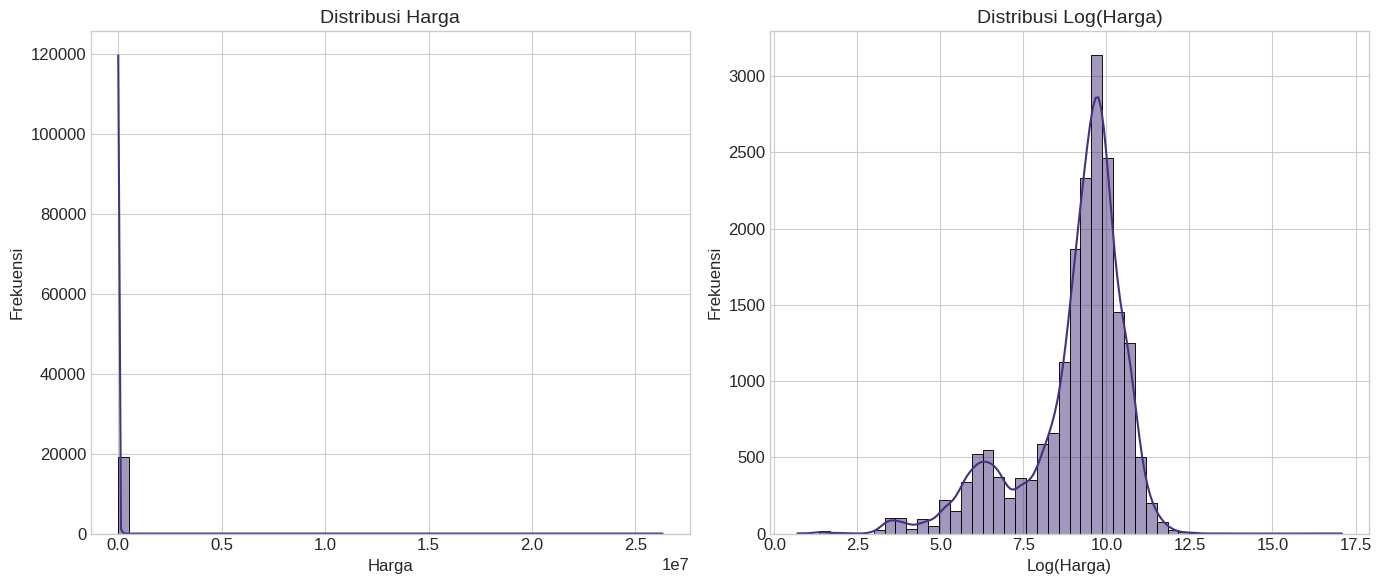

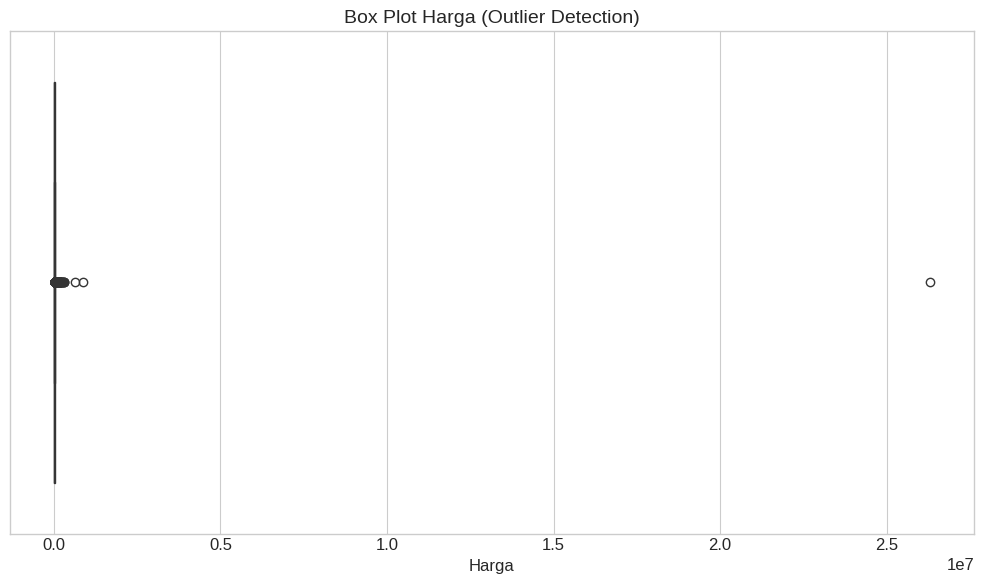

In [121]:
# Visualisasi distribusi harga (variabel target)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribusi Harga', fontsize=14)
plt.xlabel('Harga')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
# Gunakan log scale untuk distribusi yang lebih baik
sns.histplot(np.log1p(df['Price']), bins=50, kde=True)
plt.title('Distribusi Log(Harga)', fontsize=14)
plt.xlabel('Log(Harga)')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Box plot untuk melihat outlier
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title('Box Plot Harga (Outlier Detection)', fontsize=14)
plt.xlabel('Harga')
plt.tight_layout()
plt.show()

Dari visualisasi di atas, terlihat jelas bahwa distribusi harga dan boxplot terlihat sangat tidak informatif. Fenomena ini disebabkan oleh keberadaan **outlier yang sangat ekstrem** dalam dataset. 

🔍 **Mengapa Visualisasi Terlihat Tidak Informatif?**  

1️⃣ **Distribusi Harga Sangat Miring**  
   - Mayoritas harga terkonsentrasi di sisi kiri (nilai rendah), sementara beberapa outlier ekstrem memperlebar skala sumbu.  
   - Akibatnya, data utama "terhimpit" di satu sisi dan sulit dianalisis.  

2️⃣ **Boxplot Tidak Representatif**  
   - Rentang antar kuartil (IQR) terlalu kecil dibandingkan dengan rentang harga keseluruhan.  
   - Outlier membuat whisker sangat panjang, sehingga struktur utama boxplot hampir tidak terlihat.  

3️⃣ **Kesenjangan Harga yang Terlalu Besar**  
   - Ada mobil dengan harga ratusan kali lipat lebih tinggi dari median, yang mungkin merupakan mobil super-luxury atau kesalahan data.  

📊 **Dampak terhadap Analisis**  
- ⚠️ **Statistik jadi Bias** → Mean sangat terpengaruh oleh outlier, tidak mewakili harga mobil rata-rata.  
- 🤖 **Model Prediktif Bisa Terganggu** → Outlier ekstrem dapat menyebabkan model terlalu fokus pada kasus tidak umum.  
- 👀 **Sulit Ditafsirkan** → Visualisasi tidak mencerminkan pola harga yang sebenarnya.  

🎯 **Solusi untuk Tahap Ini**  
Agar analisis lebih bermakna, kita akan:  
- ✅ **Menyaring data dengan persentil 99%** → Menghapus harga paling ekstrem agar distribusi lebih jelas.  
- ✅ **Menghasilkan visualisasi yang lebih informatif** → Fokus pada harga yang lebih representatif.  

🚀 **Langkah ini akan membantu kita memahami tren harga mobil dengan lebih baik!**

---

### 📉 **Distribusi Harga dengan Fokus pada 99% Data**  

Untuk memahami distribusi harga dengan lebih baik, kita melakukan berbagai visualisasi yang mempertimbangkan **outlier** dan **skewness** dalam dataset.  

🔎 **Apa yang kita lihat?**  
1️⃣ **Histogram (99% data)** menunjukkan distribusi harga dengan menghilangkan **1% harga tertinggi** agar lebih jelas tanpa distorsi dari outlier.  
2️⃣ **Histogram dengan skala log** membantu menyajikan distribusi yang lebih **normal** dengan mengurangi efek skewness.  
3️⃣ **Box plot (99% data)** memberikan gambaran mengenai penyebaran harga serta mendeteksi **outlier** dalam batas yang lebih wajar.  
4️⃣ **Violin plot** memperlihatkan **kepadatan data** di berbagai rentang harga, memberikan wawasan tambahan tentang distribusi dan pola harga.  

In [122]:
p99 = np.percentile(df['Price'], 99)

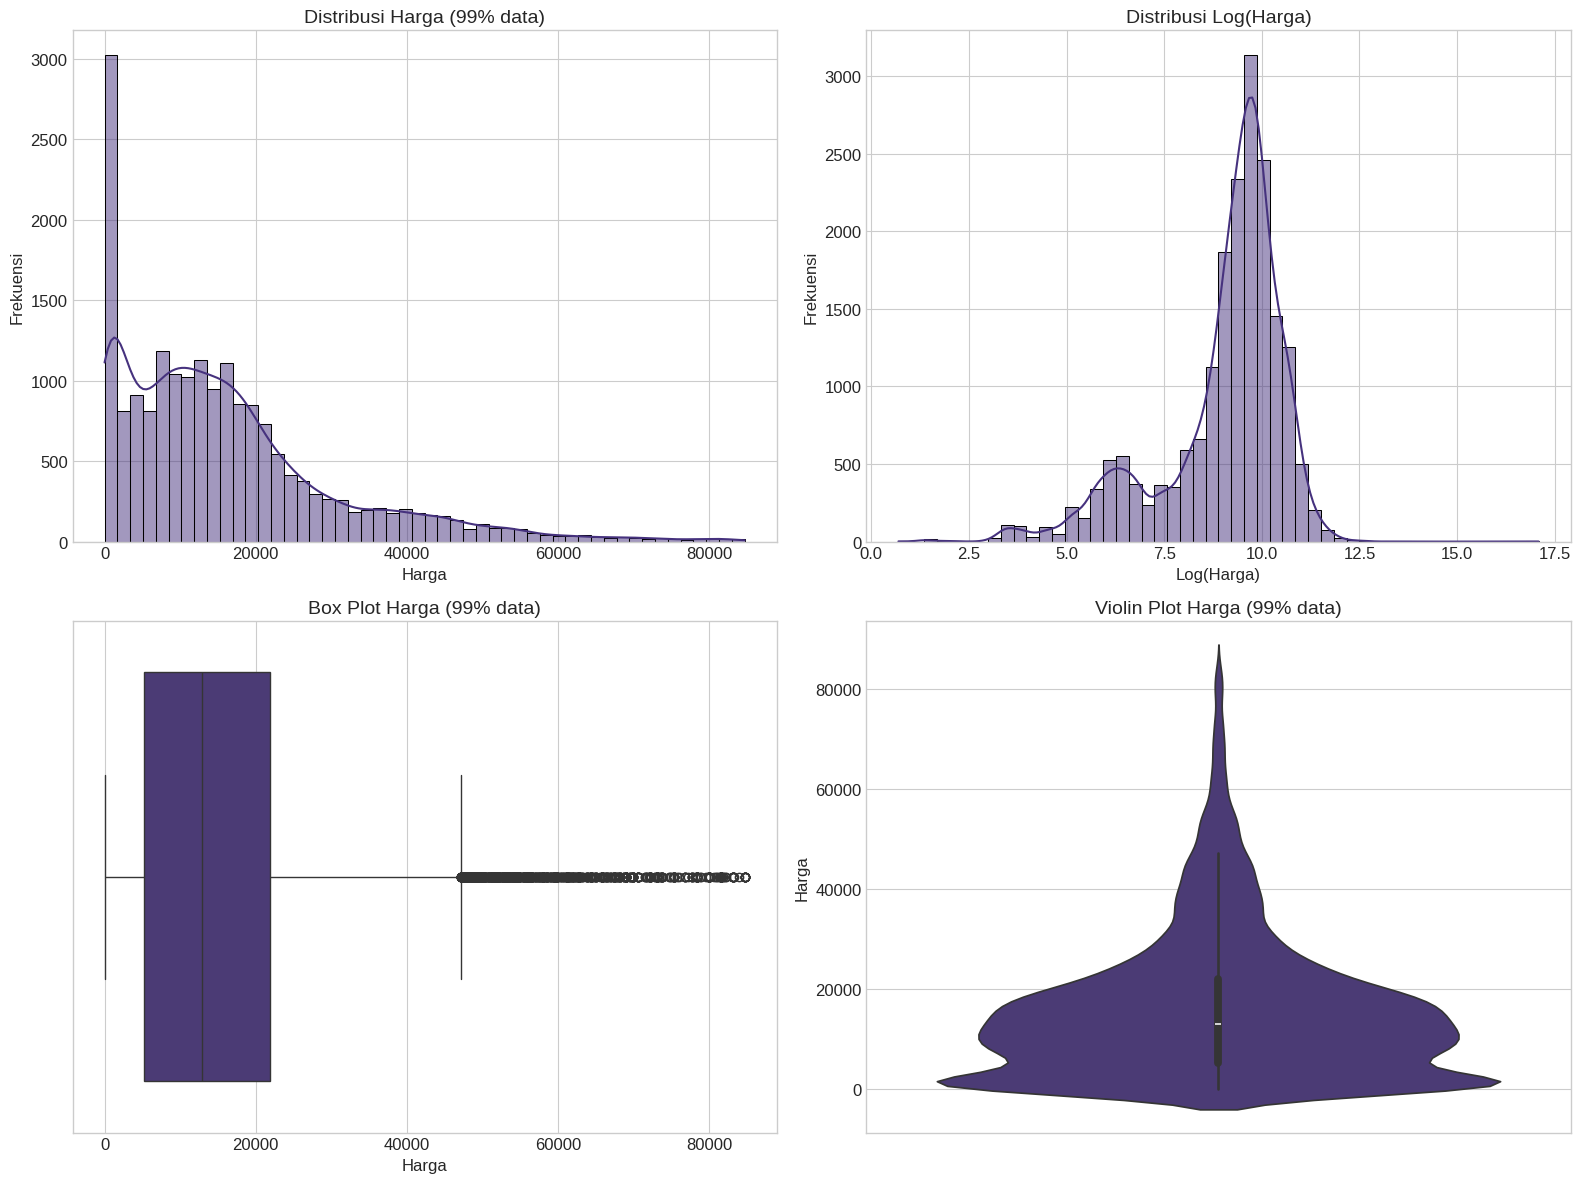

In [123]:
plt.figure(figsize=(16, 12))

# Histogram harga asli dengan zoom pada bagian utama data (percentile ke-99)
plt.subplot(2, 2, 1)
sns.histplot(df[df['Price'] <= p99]['Price'], bins=50, kde=True)
plt.title('Distribusi Harga (99% data)', fontsize=14)
plt.xlabel('Harga')
plt.ylabel('Frekuensi')

# Histogram dengan log transformasi
plt.subplot(2, 2, 2)
sns.histplot(np.log1p(df['Price']), bins=50, kde=True)
plt.title('Distribusi Log(Harga)', fontsize=14)
plt.xlabel('Log(Harga)')
plt.ylabel('Frekuensi')

# Boxplot dengan skala normal - zoom pada bagian utama
plt.subplot(2, 2, 3)
sns.boxplot(x=df[df['Price'] <= p99]['Price'])
plt.title('Box Plot Harga (99% data)', fontsize=14)
plt.xlabel('Harga')

# Violin plot untuk visualisasi distribusi yang lebih baik
plt.subplot(2, 2, 4)
sns.violinplot(y=df[df['Price'] <= p99]['Price'])
plt.title('Violin Plot Harga (99% data)', fontsize=14)
plt.ylabel('Harga')

plt.tight_layout()
plt.show()

📊 **Analisis Visualisasi Harga Mobil**  

Dari visualisasi di atas, kita dapat melihat beberapa pola menarik terkait distribusi harga mobil:  

1️⃣ **Distribusi Harga (Histogram - Kiri Atas)**  
   - Harga mobil menunjukkan distribusi **sangat miring ke kanan** dengan mayoritas harga di bawah 20.000.  
   - Ada **lonjakan signifikan di harga yang sangat rendah (<1000)** yang tampaknya **tidak realistis**.  
   - Beberapa puncak menunjukkan adanya segmentasi harga tertentu.  

2️⃣ **Distribusi Log(Harga) (Histogram - Kanan Atas)**  
   - Setelah menerapkan **transformasi log**, distribusi harga menjadi lebih normal.  
   - Ini membantu kita memahami variasi harga yang lebih seimbang tanpa distorsi dari outlier ekstrem.  
   - Terlihat ada beberapa kelompok harga yang dominan.  

3️⃣ **Box Plot Harga (Bawah Kiri)**  
   - **Banyak titik outlier** di sisi kanan yang menunjukkan adanya mobil dengan harga sangat tinggi.  
   - **Median harga cukup rendah**, menandakan bahwa kebanyakan mobil dalam dataset ini relatif terjangkau.  
   - Harga di bawah 1000 masih muncul sebagai anomali yang patut diselidiki.  

4️⃣ **Violin Plot Harga (Bawah Kanan)**  
   - Violin plot memperjelas distribusi harga dengan bentuk yang lebih detail.  
   - Terlihat bahwa sebagian besar mobil memiliki harga rendah, tetapi terdapat ekor panjang ke atas, menunjukkan harga mobil yang lebih tinggi.  
   - Sekali lagi, banyak data mobil dengan harga yang **tidak realistis** di bawah 1000.  

🔎 **Kesimpulan Awal**  
✅ Harga mobil mayoritas berada di kisaran rendah, tetapi ada lonjakan harga yang tidak masuk akal.  
✅ **Banyak mobil dengan harga di bawah 1000**, yang kemungkinan besar merupakan kesalahan data atau kategori khusus.  
✅ Untuk analisis lebih lanjut, kita bisa menyaring harga yang lebih masuk akal agar model lebih akurat dan tidak terpengaruh oleh data ekstrem.  

---

### 🚗 **Bagaimana Tahun Produksi Mempengaruhi Harga?**  

Untuk memahami hubungan antara **tahun produksi** dan **harga**, kita menggunakan dua pendekatan visual:  

🔎 **Apa yang kita lihat?**  
1️⃣ **Scatter Plot** (99% data) – Menunjukkan pola hubungan antara **tahun produksi** dan **harga**.  
2️⃣ **Box Plot (Log Harga) per Tahun** (2010-2020) – Menampilkan distribusi harga dengan transformasi log.  

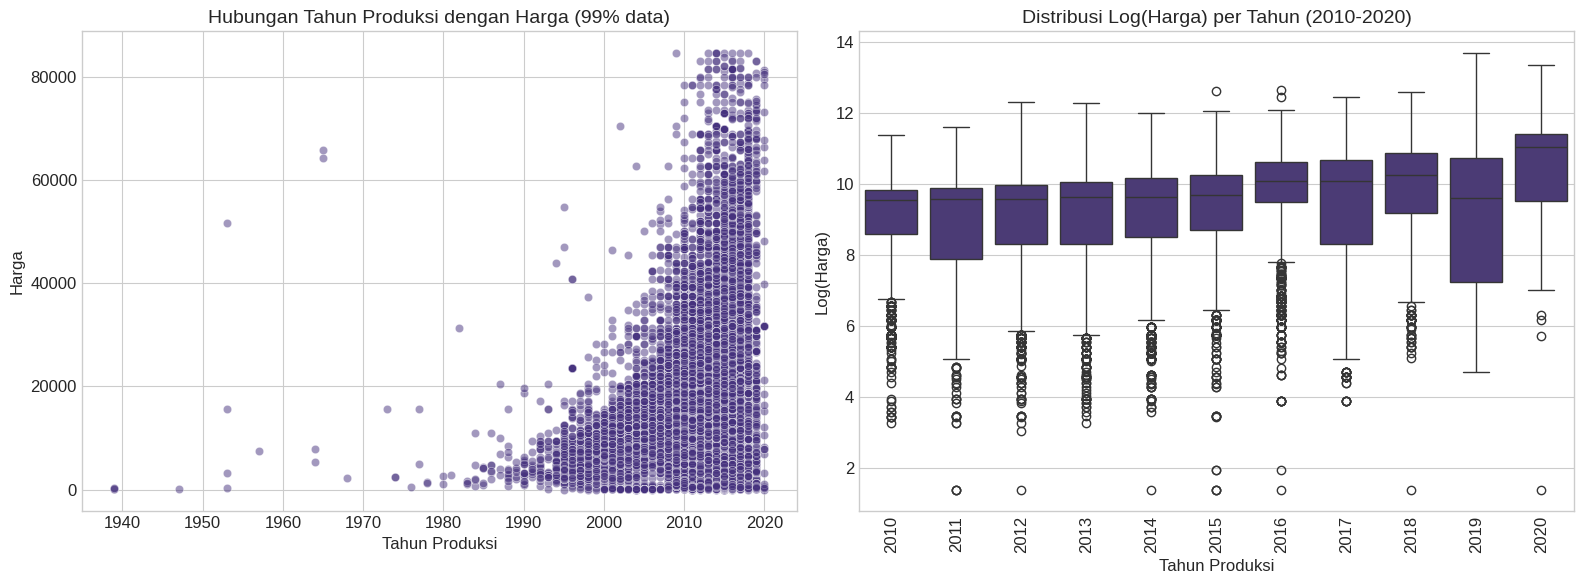

In [124]:
plt.figure(figsize=(16, 6))

# Scatter plot dengan filter persentil ke-99
plt.subplot(1, 2, 1)
filtered_df = df[df['Price'] <= p99]
sns.scatterplot(x='Prod. year', y='Price', data=filtered_df, alpha=0.5)
plt.title('Hubungan Tahun Produksi dengan Harga (99% data)', fontsize=14)
plt.xlabel('Tahun Produksi')
plt.ylabel('Harga')

# Box plot dengan transformasi log
plt.subplot(1, 2, 2)
recent_years = df[df['Prod. year'] >= 2010].copy()
recent_years['Log_Price'] = np.log1p(recent_years['Price'])
sns.boxplot(x='Prod. year', y='Log_Price', data=recent_years)
plt.title('Distribusi Log(Harga) per Tahun (2010-2020)', fontsize=14)
plt.xlabel('Tahun Produksi')
plt.ylabel('Log(Harga)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

📊 **Analisis Hubungan Tahun Produksi dengan Harga Mobil**  

Visualisasi ini membantu kita memahami bagaimana harga mobil bervariasi berdasarkan tahun produksinya.  

**1️⃣ Scatter Plot (Kiri) - Hubungan Tahun Produksi dengan Harga**
- Mobil yang lebih baru **cenderung memiliki harga lebih tinggi** dibandingkan yang lebih tua.  
- Distribusi harga **sangat padat setelah tahun 2000**, menunjukkan bahwa mayoritas mobil dalam dataset ini berasal dari periode tersebut.  
- **Banyak mobil dengan harga sangat rendah (<1000), terutama di tahun lama**, yang tampaknya **tidak realistis** dan kemungkinan besar merupakan data yang perlu diperiksa ulang.  
- Ada beberapa mobil tua dengan harga sangat tinggi, kemungkinan merupakan **mobil kolektor atau klasik yang langka**.  

**2️⃣ Box Plot (Kanan) - Distribusi Log(Harga) per Tahun (2010-2020)**
- Tren harga secara umum **meningkat seiring bertambahnya tahun produksi**.  
- **Median harga mobil baru lebih tinggi dibandingkan mobil lama**, yang sesuai dengan ekspektasi.  
- **Rentang harga semakin besar di tahun-tahun terbaru**, menunjukkan semakin banyak variasi dalam kategori mobil yang dijual (mobil premium vs. mobil biasa).  
- **Banyak outlier di harga rendah, terutama sebelum 2015**, yang bisa menunjukkan mobil bekas dengan harga sangat murah atau kesalahan data.  

**🔎 Kesimpulan Utama**
✅ Harga mobil **semakin tinggi seiring dengan tahun produksi yang lebih baru**.  
✅ Banyak mobil dengan harga **tidak realistis di bawah 1000**, terutama di tahun lama.  
✅ **Data mobil klasik yang mahal mungkin menarik untuk dianalisis lebih lanjut**.  
✅ **Mobil produksi terbaru (2018-2020) menunjukkan distribusi harga yang lebih luas**, mungkin karena variasi antara mobil standar dan model mewah.  

---

### 📊 **Analisis Tren Harga Berdasarkan Tahun Produksi**  

🔍 **Apa yang kita lakukan?**  
Untuk memahami **perubahan harga mobil dari waktu ke waktu**, kita melakukan agregasi **rata-rata** dan **median harga** berdasarkan tahun produksi.  

🚀 **Langkah-langkahnya:**  
1️⃣ **Mengelompokkan data** berdasarkan **tahun produksi** dan menghitung:  
   - **Mean (Rata-rata Harga)** → Memberikan gambaran tentang **tren umum harga**.  
   - **Median Harga** → Mengurangi pengaruh **outlier** sehingga lebih mewakili mayoritas kendaraan.  
   - **Jumlah sampel per tahun** → Memastikan kita hanya mempertimbangkan tahun dengan **lebih dari 50 sampel** agar hasilnya lebih stabil.  

2️⃣ **Visualisasi tren harga dari waktu ke waktu**:  
   - Grafik pertama menunjukkan **rata-rata harga** per tahun produksi.  
   - Grafik kedua menampilkan **median harga**, memberikan gambaran yang lebih **robust** terhadap data ekstrem.  

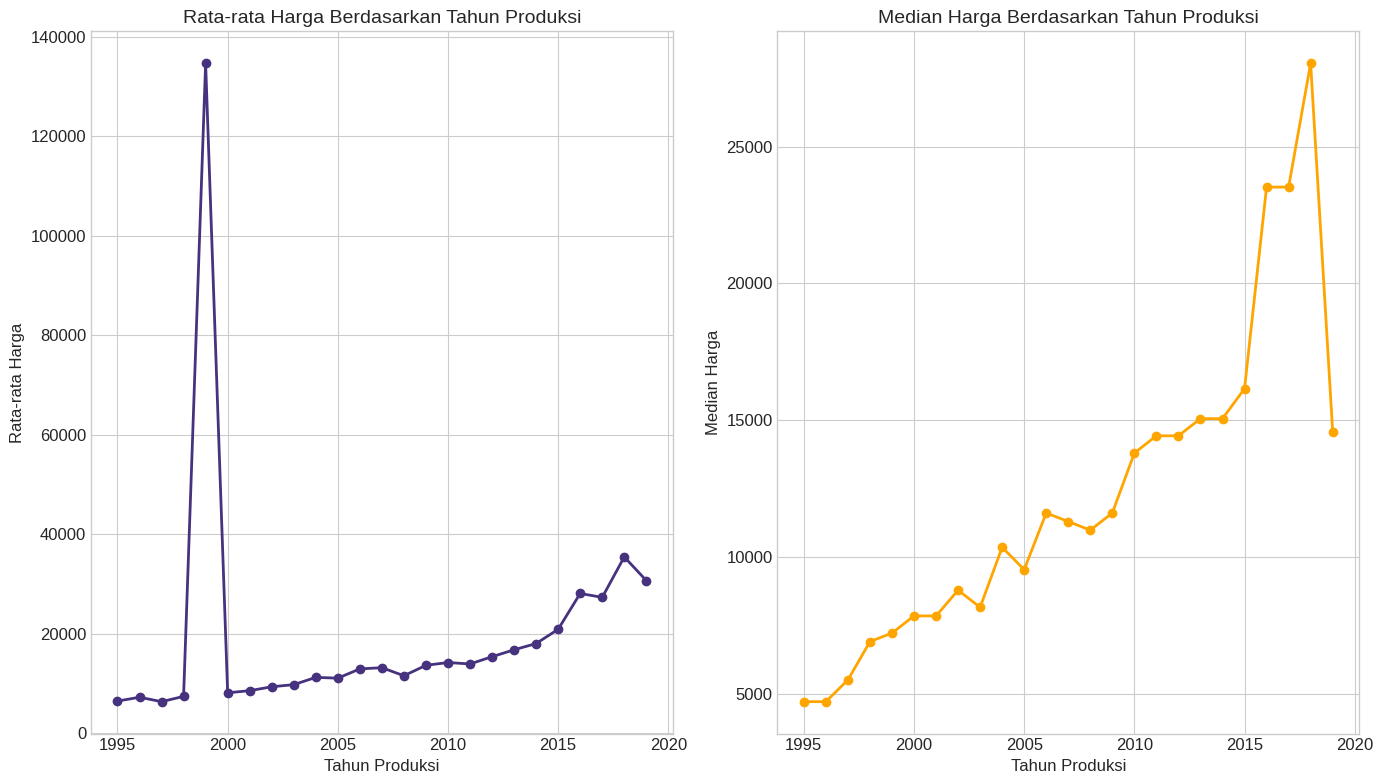

In [125]:
plt.figure(figsize=(14, 8))

# Agregasi rata-rata harga per tahun
yearly_avg = df.groupby('Prod. year')['Price'].agg(['mean', 'median', 'count']).reset_index()
yearly_avg = yearly_avg[yearly_avg['count'] > 50]  # Filter tahun dengan sampel cukup

plt.subplot(1, 2, 1)
plt.plot(yearly_avg['Prod. year'], yearly_avg['mean'], marker='o', linewidth=2)
plt.title('Rata-rata Harga Berdasarkan Tahun Produksi', fontsize=14)
plt.xlabel('Tahun Produksi')
plt.ylabel('Rata-rata Harga')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(yearly_avg['Prod. year'], yearly_avg['median'], marker='o', linewidth=2, color='orange')
plt.title('Median Harga Berdasarkan Tahun Produksi', fontsize=14)
plt.xlabel('Tahun Produksi')
plt.ylabel('Median Harga')
plt.grid(True)

plt.tight_layout()
plt.show()

📊 **Analisis Harga Mobil Berdasarkan Tahun Produksi (Tanpa Persentil 99%)**  

Visualisasi ini menampilkan **rata-rata** dan **median** harga mobil berdasarkan tahun produksi **tanpa filter persentil 99%**, sehingga outlier lebih jelas terlihat.  

**1️⃣ Grafik Kiri - Rata-rata Harga per Tahun Produksi**  
- **Terjadi lonjakan harga yang ekstrem sekitar tahun 1999**, menunjukkan adanya **outlier besar** yang mendorong rata-rata naik drastis.  
- Setelah tahun 2000, tren rata-rata harga meningkat perlahan seiring waktu, yang lebih mencerminkan nilai pasar sebenarnya.  
- **Outlier ekstrem dapat mengaburkan pola tren sebenarnya**, sehingga perlu ditelusuri lebih lanjut (mungkin ada mobil mewah atau kesalahan data).  

**2️⃣ Grafik Kanan - Median Harga per Tahun Produksi**  
- **Median harga cenderung lebih stabil dan meningkat dari tahun ke tahun**, berbeda dengan rata-rata yang terpengaruh oleh outlier.  
- **Tahun 2018-2020 menunjukkan lonjakan harga signifikan**, yang bisa disebabkan oleh peningkatan harga mobil baru atau adanya lebih banyak model premium di data tersebut.  
- **Penurunan tajam di tahun 2020 bisa menunjukkan jumlah data lebih sedikit atau lebih banyak mobil bekas murah dibandingkan tahun sebelumnya**.  

**🔎 Kesimpulan Utama**  
✅ **Outlier ekstrem di tahun 1999** sangat mempengaruhi rata-rata harga.  
✅ **Median harga lebih stabil dan menunjukkan tren kenaikan alami**.  
✅ **Data tahun 2020 perlu diteliti lebih lanjut**, apakah terjadi bias data atau faktor pasar lainnya.  

---

### 🚗 **Analisis Produsen dan Kategori Kendaraan**  

🔍 **Apa yang kita lakukan?**  
Kita mengeksplorasi **produsen dan kategori kendaraan** berdasarkan **jumlah kendaraan** serta **rata-rata harga** untuk mendapatkan wawasan pasar.  

🚀 **Langkah-langkahnya:**  
1️⃣ **Menentukan 10 produsen teratas** berdasarkan:  
   - **Jumlah kendaraan** yang tersedia di dataset.  
   - **Rata-rata harga kendaraan**, untuk melihat produsen dengan kendaraan paling mahal.  

2️⃣ **Menganalisis kategori kendaraan** dengan:  
   - **Distribusi jumlah kendaraan** di setiap kategori.  
   - **Rata-rata harga per kategori**, untuk memahami kelas kendaraan mana yang paling premium.  

💡 **Mengapa ini penting?**  
- Mengidentifikasi **produsen dengan dominasi pasar**.  
- Memahami bagaimana **kategori kendaraan** memengaruhi harga.  

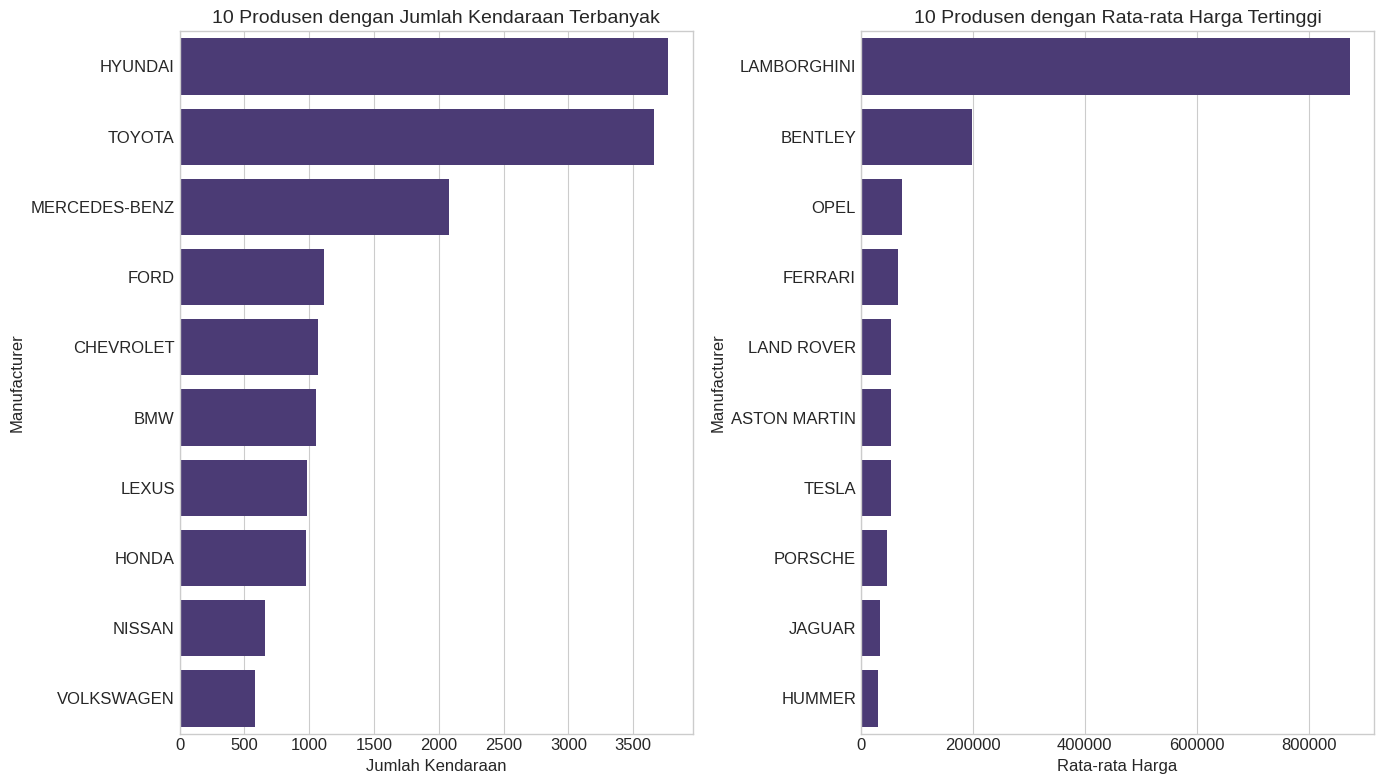

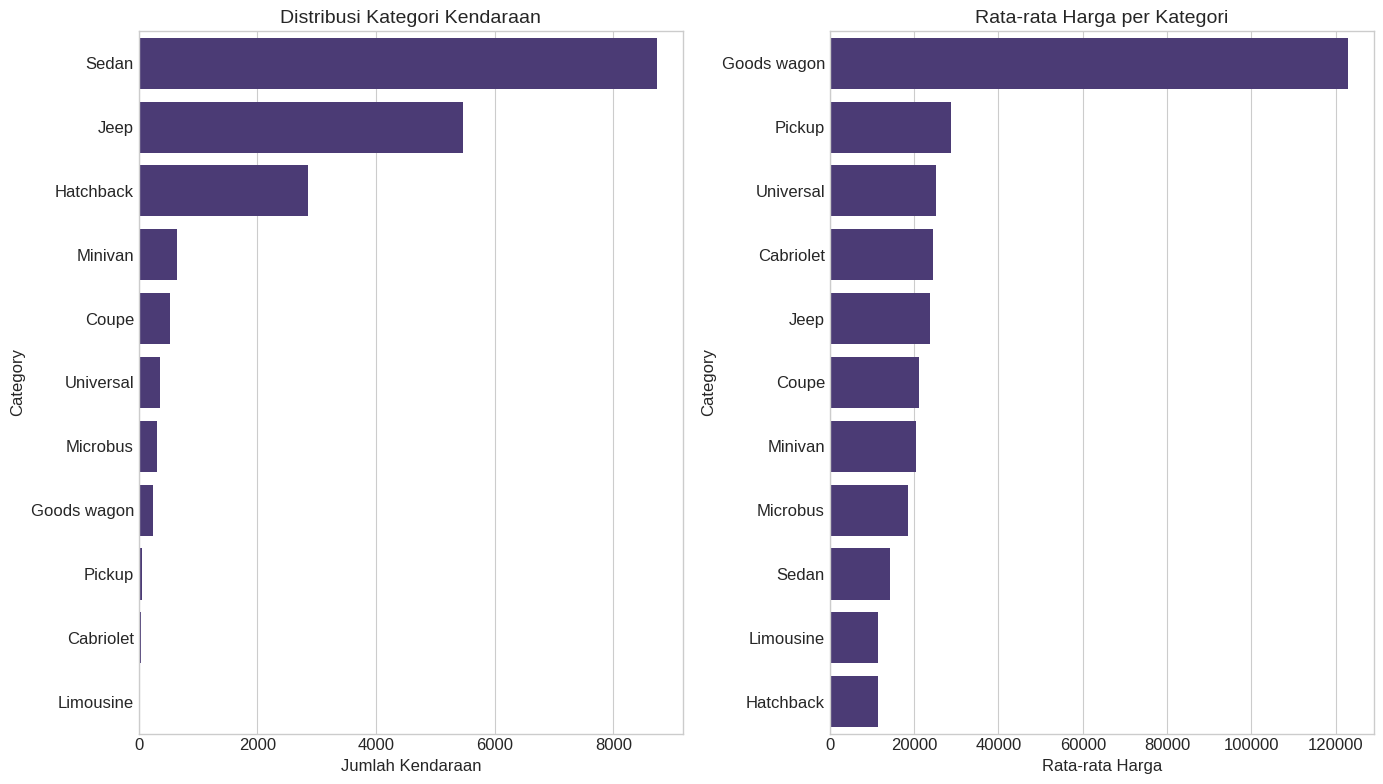

In [126]:
# Visualisasi produsen teratas berdasarkan rata-rata harga
plt.figure(figsize=(14, 8))

# Top 10 manufacturer berdasarkan jumlah kendaraan
plt.subplot(1, 2, 1)
top_manufacturers = df['Manufacturer'].value_counts().head(10)
sns.barplot(x=top_manufacturers.values, y=top_manufacturers.index)
plt.title('10 Produsen dengan Jumlah Kendaraan Terbanyak', fontsize=14)
plt.xlabel('Jumlah Kendaraan')

# Top 10 manufacturer berdasarkan rata-rata harga
plt.subplot(1, 2, 2)
manufacturer_price = df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=manufacturer_price.values, y=manufacturer_price.index)
plt.title('10 Produsen dengan Rata-rata Harga Tertinggi', fontsize=14)
plt.xlabel('Rata-rata Harga')

plt.tight_layout()
plt.show()

# Visualisasi kategori kendaraan
plt.figure(figsize=(14, 8))

# Distribusi kategori
plt.subplot(1, 2, 1)
category_counts = df['Category'].value_counts()
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Distribusi Kategori Kendaraan', fontsize=14)
plt.xlabel('Jumlah Kendaraan')

# Rata-rata harga per kategori
plt.subplot(1, 2, 2)
category_price = df.groupby('Category')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=category_price.values, y=category_price.index)
plt.title('Rata-rata Harga per Kategori', fontsize=14)
plt.xlabel('Rata-rata Harga')

plt.tight_layout()
plt.show()

Tanpa filter persentil 99%, **outlier terlihat jelas!**

**🔥 1. Hyundai vs Lamborghini: Dua Kutub Berbeda!**  
📌 **Hyundai & Toyota** 🏆 menjadi **raja jumlah kendaraan**, membanjiri pasar dengan model terjangkau.  
📌 **Lamborghini** 💰 jauh di atas produsen lain dalam **rata-rata harga**, melesat seperti supercar yang mereka buat!  

> **Kesimpulan:** Merek dengan mobil terbanyak ≠ Merek dengan harga tertinggi!  

**💎 2. Siapa Sebenarnya Mobil Mahal Itu?**  
📌 **Lamborghini & Bentley** 🏎️ **menghancurkan rata-rata harga**, membuat merek lain seperti Ferrari terlihat "murah".  
📌 **Opel** mengejutkan! 😲 Merek yang biasanya di kelas menengah justru masuk dalam daftar harga tertinggi. Ada **anomali atau model spesial?**  

> **Analisis mendalam diperlukan**: Apakah ini efek **mobil klasik, model langka, atau kesalahan data?**  

**🔎 3. Mobil Listrik vs Mobil Mewah**  
📌 **Tesla menyelinap ke daftar produsen termahal!** ⚡  
📌 Ini membuktikan **mobil listrik premium mulai menantang mobil mewah konvensional** seperti Aston Martin dan Land Rover.  

> **Apakah tren mobil listrik semakin mahal?** Bisa jadi, Tesla menjadi standar baru untuk kendaraan premium!  

🔎 Kesimpulan Utama         
✅ Jumlah kendaraan tidak selalu berhubungan dengan harga rata-rata tinggi (contoh: Hyundai memiliki jumlah terbanyak tetapi tidak masuk dalam daftar harga tertinggi).         
✅ Beberapa produsen mewah memiliki rata-rata harga yang sangat tinggi karena kehadiran mobil super eksklusif.          
✅ Outlier harga ekstrem terlihat di Lamborghini, yang menyebabkan rata-rata harga jauh lebih tinggi dibandingkan merek lainnya.

---

### 🔎 **Mengungkap Faktor yang Mempengaruhi Harga Kendaraan**  

🚗 **Apa yang kita lakukan?**  
Kita mengeksplorasi bagaimana fitur-fitur utama seperti **jenis bahan bakar, interior kulit, tipe transmisi, dan sistem penggerak roda** memengaruhi harga kendaraan.  

🔍 **Langkah-langkah utama:**  
1️⃣ **Menggunakan box plot** untuk melihat distribusi harga di setiap kategori dengan **pemangkasan persentil 99%**, agar tidak terpengaruh outlier ekstrem.  
2️⃣ **Menambahkan nilai rata-rata harga di setiap kategori** untuk memberikan konteks yang lebih jelas.  
3️⃣ **Menggunakan violin plot dengan transformasi log** untuk menampilkan distribusi harga dengan lebih halus dan menangani skala yang tidak merata.  

💡 **Kenapa ini penting?**  
- Membantu memahami fitur apa yang paling **berpengaruh terhadap harga**.  
- Mengidentifikasi pola pasar dan preferensi pelanggan terhadap **fitur premium** seperti interior kulit atau penggerak roda tertentu.  

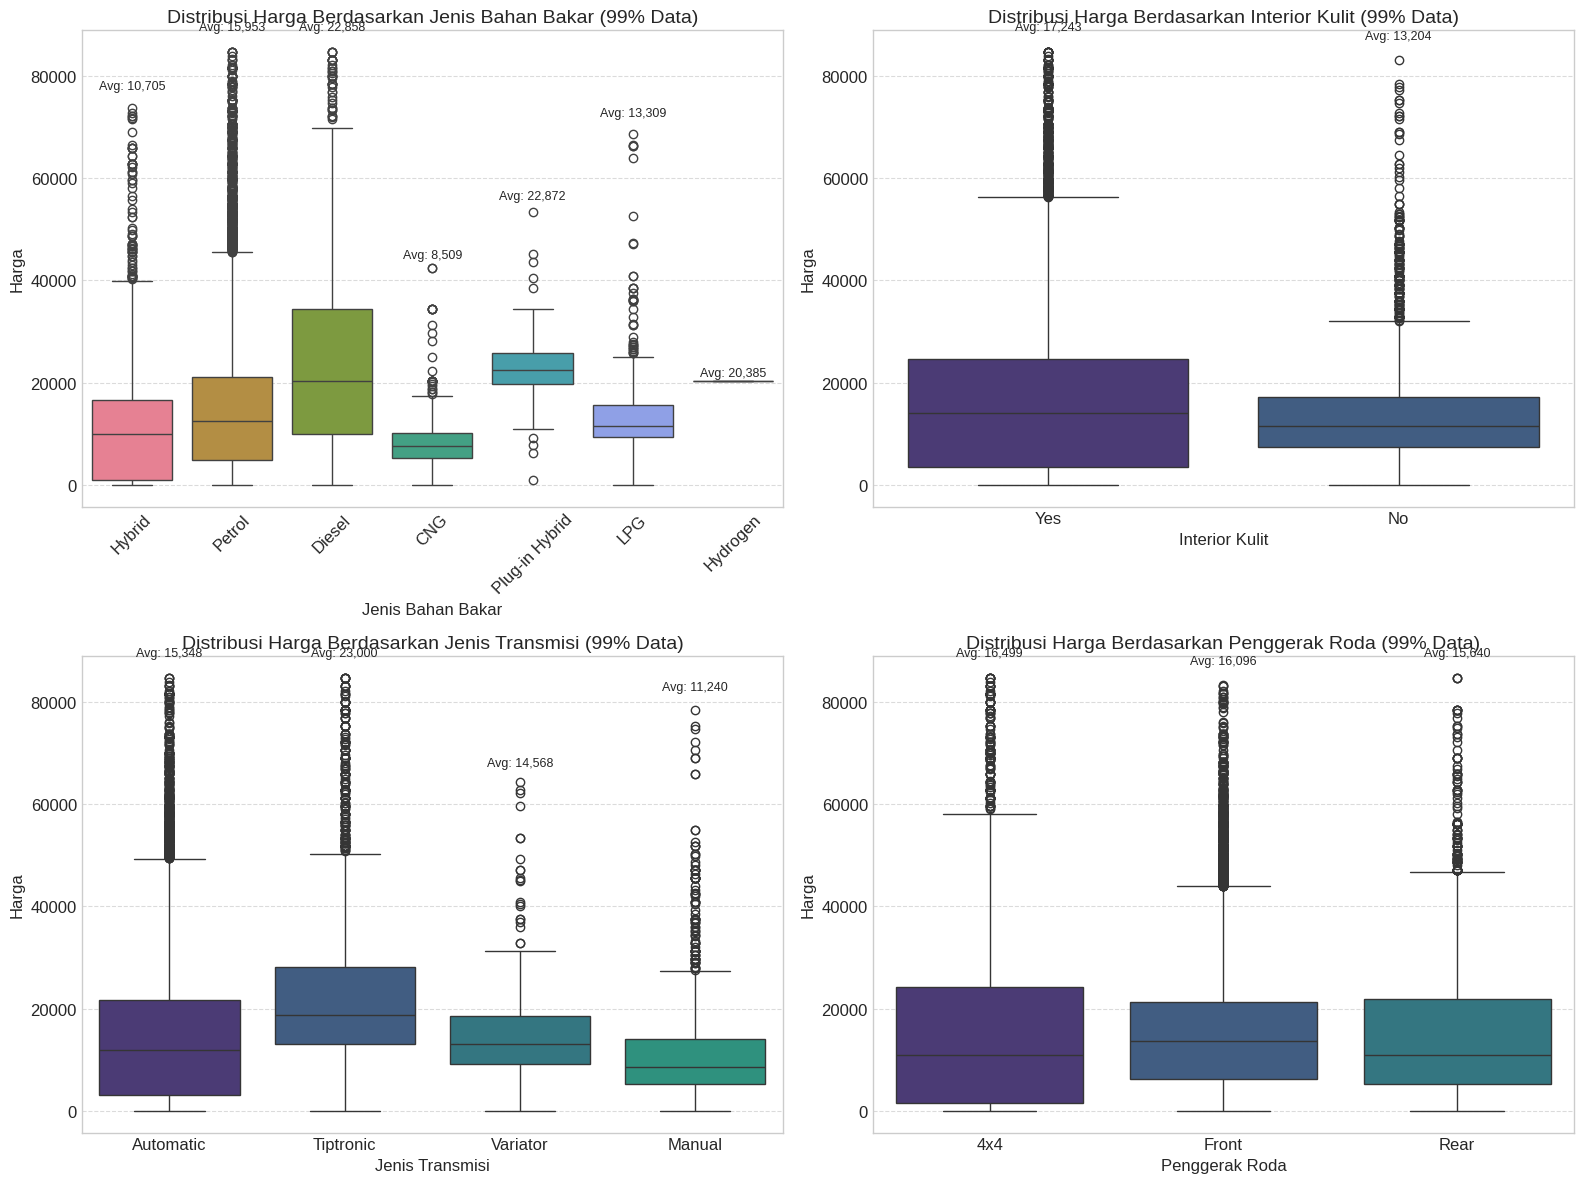

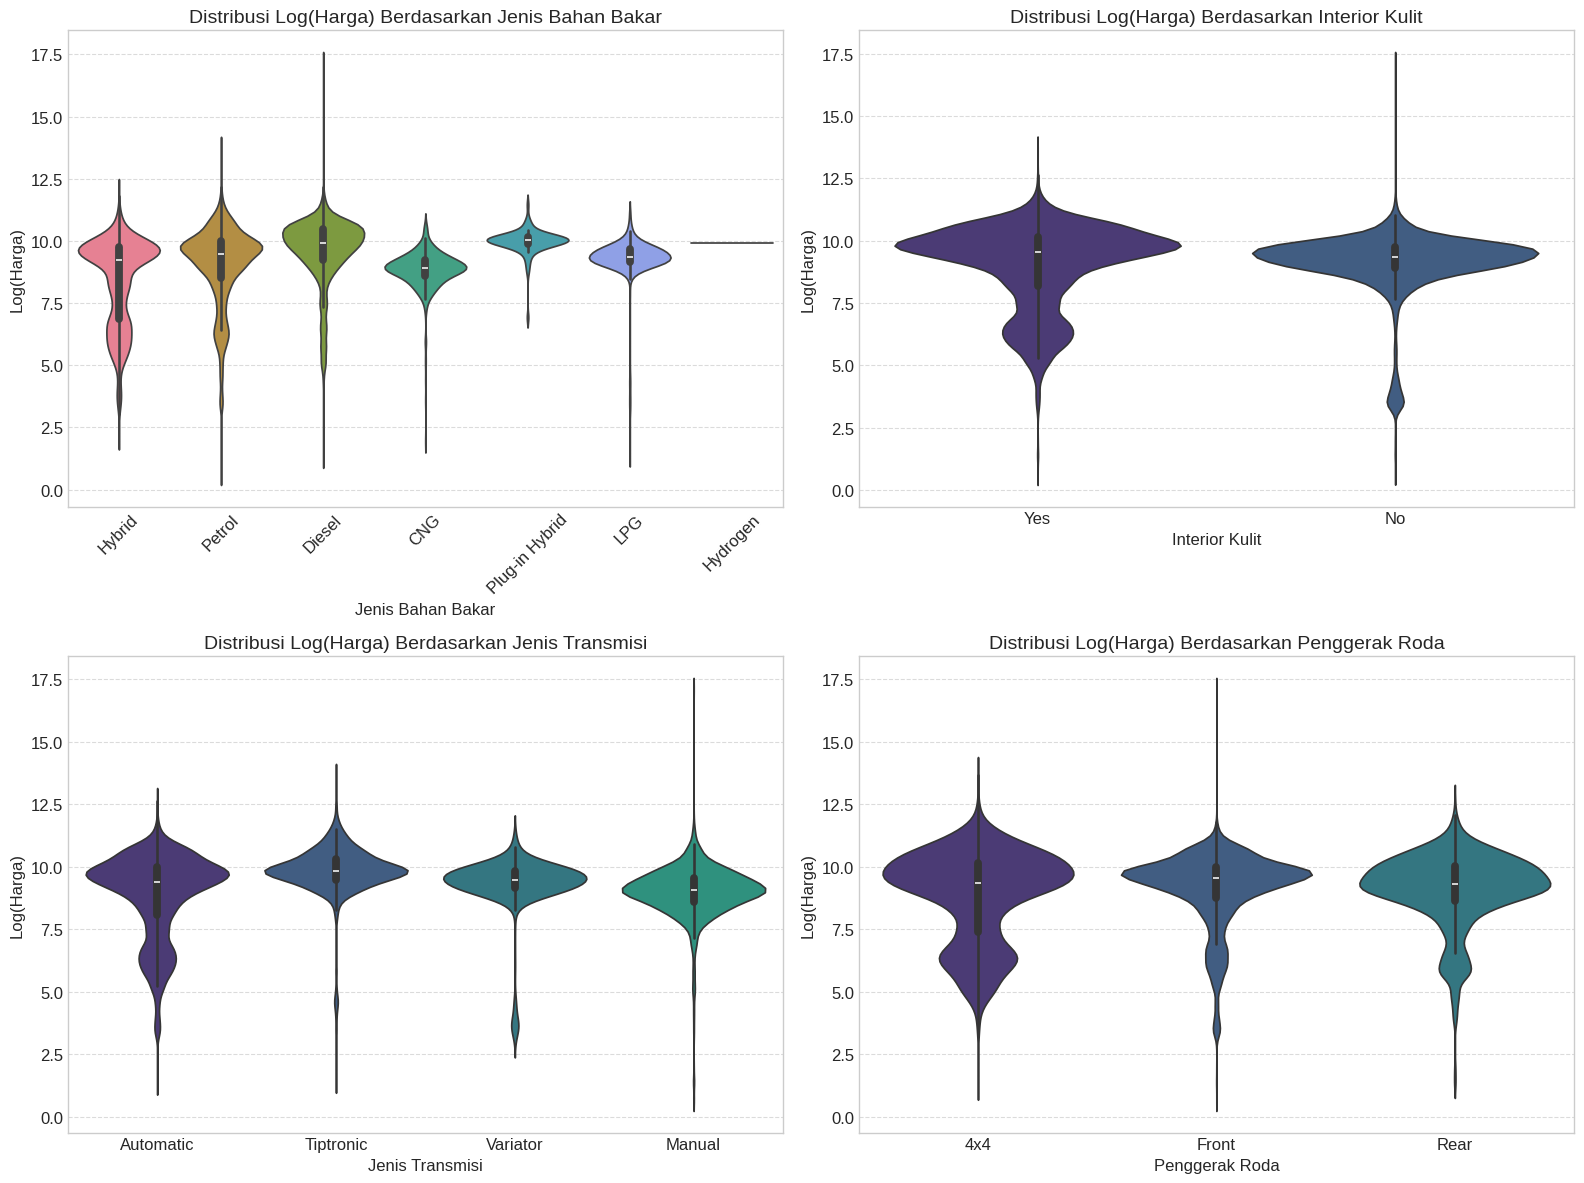

In [127]:
# Visualisasi faktor-faktor yang mempengaruhi harga (dengan persentil 99%)
plt.figure(figsize=(16, 12))

# Filter data dengan persentil 99% untuk visualisasi yang lebih baik
df_filtered = df[df['Price'] <= p99]

# Fuel Type
plt.subplot(2, 2, 1)
sns.boxplot(x='Fuel type', y='Price', data=df_filtered, hue='Fuel type', legend=False)
plt.title('Distribusi Harga Berdasarkan Jenis Bahan Bakar (99% Data)', fontsize=14)
plt.xlabel('Jenis Bahan Bakar', fontsize=12)
plt.ylabel('Harga', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan angka rata-rata di atas setiap box
for i, fuel_type in enumerate(df_filtered['Fuel type'].unique()):
    avg_price = df_filtered[df_filtered['Fuel type'] == fuel_type]['Price'].mean()
    plt.text(i, df_filtered[df_filtered['Fuel type'] == fuel_type]['Price'].max() * 1.05, 
             f'Avg: {int(avg_price):,}', ha='center', fontsize=9)

# Leather Interior
plt.subplot(2, 2, 2)
sns.boxplot(x='Leather interior', y='Price', data=df_filtered, hue='Leather interior', legend=False)
plt.title('Distribusi Harga Berdasarkan Interior Kulit (99% Data)', fontsize=14)
plt.xlabel('Interior Kulit', fontsize=12)
plt.ylabel('Harga', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan angka rata-rata di atas setiap box
for i, leather in enumerate(df_filtered['Leather interior'].unique()):
    avg_price = df_filtered[df_filtered['Leather interior'] == leather]['Price'].mean()
    plt.text(i, df_filtered[df_filtered['Leather interior'] == leather]['Price'].max() * 1.05, 
             f'Avg: {int(avg_price):,}', ha='center', fontsize=9)

# Gear Box Type
plt.subplot(2, 2, 3)
sns.boxplot(x='Gear box type', y='Price', data=df_filtered, hue='Gear box type', legend=False)
plt.title('Distribusi Harga Berdasarkan Jenis Transmisi (99% Data)', fontsize=14)
plt.xlabel('Jenis Transmisi', fontsize=12)
plt.ylabel('Harga', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan angka rata-rata di atas setiap box
for i, gearbox in enumerate(df_filtered['Gear box type'].unique()):
    avg_price = df_filtered[df_filtered['Gear box type'] == gearbox]['Price'].mean()
    plt.text(i, df_filtered[df_filtered['Gear box type'] == gearbox]['Price'].max() * 1.05, 
             f'Avg: {int(avg_price):,}', ha='center', fontsize=9)

# Drive Wheels
plt.subplot(2, 2, 4)
sns.boxplot(x='Drive wheels', y='Price', data=df_filtered, hue='Drive wheels', legend=False)
plt.title('Distribusi Harga Berdasarkan Penggerak Roda (99% Data)', fontsize=14)
plt.xlabel('Penggerak Roda', fontsize=12)
plt.ylabel('Harga', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan angka rata-rata di atas setiap box
for i, drive in enumerate(df_filtered['Drive wheels'].unique()):
    avg_price = df_filtered[df_filtered['Drive wheels'] == drive]['Price'].mean()
    plt.text(i, df_filtered[df_filtered['Drive wheels'] == drive]['Price'].max() * 1.05, 
             f'Avg: {int(avg_price):,}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Visualisasi alternatif menggunakan logaritma
plt.figure(figsize=(16, 12))

# Transformasi log pada harga untuk distribusi yang lebih baik
df['Log_Price'] = np.log1p(df['Price'])

# Fuel Type - Log Scale
plt.subplot(2, 2, 1)
sns.violinplot(x='Fuel type', y='Log_Price', data=df, hue='Fuel type', inner='box', legend=False)
plt.title('Distribusi Log(Harga) Berdasarkan Jenis Bahan Bakar', fontsize=14)
plt.xlabel('Jenis Bahan Bakar', fontsize=12)
plt.ylabel('Log(Harga)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Leather Interior - Log Scale
plt.subplot(2, 2, 2)
sns.violinplot(x='Leather interior', y='Log_Price', data=df, hue='Leather interior', inner='box', legend=False)
plt.title('Distribusi Log(Harga) Berdasarkan Interior Kulit', fontsize=14)
plt.xlabel('Interior Kulit', fontsize=12)
plt.ylabel('Log(Harga)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gear Box Type - Log Scale
plt.subplot(2, 2, 3)
sns.violinplot(x='Gear box type', y='Log_Price', data=df, hue='Gear box type', inner='box', legend=False)
plt.title('Distribusi Log(Harga) Berdasarkan Jenis Transmisi', fontsize=14)
plt.xlabel('Jenis Transmisi', fontsize=12)
plt.ylabel('Log(Harga)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Drive Wheels - Log Scale
plt.subplot(2, 2, 4)
sns.violinplot(x='Drive wheels', y='Log_Price', data=df, hue='Drive wheels', inner='box', legend=False)
plt.title('Distribusi Log(Harga) Berdasarkan Penggerak Roda', fontsize=14)
plt.xlabel('Penggerak Roda', fontsize=12)
plt.ylabel('Log(Harga)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Dari kedua visualisasi di atas, kita dapat melihat bagaimana faktor-faktor seperti **jenis bahan bakar, interior kulit, jenis transmisi, dan penggerak roda** mempengaruhi harga kendaraan.  

**🔍 Visualisasi 1: Distribusi Harga Kendaraan (99% Data) - Boxplot**  
1️⃣ **Jenis Bahan Bakar 🚗⛽**  
   - **Plug-in Hybrid** memiliki harga rata-rata tertinggi, menunjukkan bahwa teknologi elektrifikasi masih tergolong premium.  
   - **CNG dan Diesel** memiliki rentang harga lebih rendah, kemungkinan karena ketersediaan pasar yang lebih terbatas.  
   - **LPG dan Hydrogen** memiliki distribusi harga yang lebih merata, namun cenderung lebih mahal daripada bahan bakar konvensional.  

2️⃣ **Interior Kulit 🛋️**  
   - Kendaraan dengan **interior kulit** memiliki harga yang lebih tinggi dibandingkan tanpa fitur ini.  
   - Hal ini mengindikasikan bahwa interior kulit lebih umum pada mobil kelas atas atau edisi khusus.  

3️⃣ **Jenis Transmisi ⚙️**  
   - **Tiptronic** memiliki harga rata-rata tertinggi, mencerminkan dominasi transmisi ini pada kendaraan premium.  
   - **Manual** tetap menjadi pilihan ekonomis dengan harga yang lebih rendah secara keseluruhan.  

4️⃣ **Penggerak Roda 🏎️**  
   - **4x4** memiliki distribusi harga lebih tinggi, menunjukkan bahwa sistem ini lebih umum pada kendaraan off-road dan SUV premium.  
   - **FWD lebih ekonomis dibandingkan RWD**, yang sering ditemukan pada mobil performa tinggi.  

**🎭 Visualisasi 2: Distribusi Log(Harga) Kendaraan - Violin Plot**  
Dalam visualisasi ini, **skala log digunakan untuk mengurangi dampak outlier**, sehingga pola distribusi lebih terlihat jelas.  

🔹 **Jenis Bahan Bakar**: Distribusi harga lebih seimbang, tetapi **Hybrid dan Plug-in Hybrid** tetap menunjukkan kecenderungan lebih mahal.  
🔹 **Interior Kulit**: Kendaraan dengan interior kulit memiliki variasi harga yang lebih luas, menandakan adanya berbagai level harga di segmen premium.  
🔹 **Jenis Transmisi**: **Tiptronic memiliki sebaran harga yang lebih lebar**, sementara **manual lebih terkonsentrasi di harga rendah**.  
🔹 **Penggerak Roda**: **4x4 memiliki harga yang lebih bervariasi**, sedangkan **RWD tetap menunjukkan distribusi yang lebih tinggi dibandingkan FWD**.  

---

Saya akan menyimpan terlebih dahulu dataset yang sudah diperbaiki formatnya ini

In [128]:
df.to_csv('data/process-data/car_price_prediction_correct_formatted.csv', index=False)

# 🔍 **Eksplorasi Data & Pra-pemrosesan**  

Sebelum membangun model, kita perlu memastikan data bersih dan siap diproses. Pertama, menangani **missing values** dengan menghapus atau mengisi nilai yang hilang menggunakan mean, median, atau mode. Selanjutnya, melakukan **normalisasi atau standarisasi** untuk menyelaraskan skala variabel numerik agar model lebih stabil, menggunakan Min-Max Scaling atau Z-score Scaling sesuai kebutuhan. Terakhir, menganalisis **korelasi antar variabel** dengan heatmap untuk memahami hubungan fitur terhadap harga, serta mengidentifikasi fitur yang redundant atau kurang relevan. Dengan langkah ini, data menjadi lebih bersih dan model dapat bekerja lebih optimal. 🚀

In [129]:
df = pd.read_csv('data/process-data/car_price_prediction_correct_formatted.csv')

## Drop Kolom ID

In [130]:
df = df.drop(columns=['ID',])

df.shape

(19237, 19)

In [131]:
df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'IsTurbo', 'Log_Price'],
      dtype='object')

## Menghapus Data Duplikat

In [132]:
# Check for duplicate rows in the DataFrame
duplicate_rows = df[df.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
       Price    Levy   Manufacturer    Model  Prod. year Category  \
192      314  1053.0  MERCEDES-BENZ    E 350        2014    Sedan   
239     2901   503.0          HONDA    Civic        2012    Sedan   
264      392  1017.0  MERCEDES-BENZ    E 300        2017    Sedan   
331      282   289.0           FORD   Escape        2008     Jeep   
347    39829  1811.0          LEXUS   GX 460        2010     Jeep   
...      ...     ...            ...      ...         ...      ...   
19222  10036   639.0        HYUNDAI   Sonata        2014    Sedan   
19227  29793  1053.0  MERCEDES-BENZ    E 350        2014    Sedan   
19228    706  1850.0  MERCEDES-BENZ    E 350        2008    Sedan   
19231   5802  1055.0  MERCEDES-BENZ    E 350        2013    Sedan   
19235   5331  1288.0      CHEVROLET  Captiva        2007     Jeep   

      Leather interior Fuel type  Engine volume  Mileage  Cylinders  \
192                Yes    Diesel            3.5   149486          6   
239          

In [133]:
df = df.drop_duplicates()
df.shape

(15725, 19)

## Feature Engineering Fitur Age

In [134]:
current_year = datetime.now().year

df['age'] = current_year - df['Prod. year']
df['age'].describe()

df.drop(columns=['Prod. year'], inplace=True)

In [135]:
df

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,IsTurbo,Log_Price,age
0,13328,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,4,Left wheel,Silver,12,False,9.497697,15
1,16621,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6,Tiptronic,4x4,4,Left wheel,Black,8,False,9.718482,14
2,8467,NaN,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,4,Right-hand drive,Black,2,False,9.044050,19
3,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,4,Left wheel,White,0,False,8.190909,14
4,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,4,Left wheel,Silver,4,False,9.369649,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,470,645.0,TOYOTA,Prius,Hatchback,Yes,Hybrid,1.8,307325,4,Automatic,Front,4,Left wheel,Silver,12,False,6.154858,14
19232,8467,NaN,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0,300000,4,Manual,Rear,2,Left wheel,Silver,5,True,9.044050,26
19233,15681,831.0,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600,4,Tiptronic,Front,4,Left wheel,Red,8,False,9.660269,14
19234,26108,836.0,HYUNDAI,Tucson,Jeep,Yes,Diesel,2.0,116365,4,Automatic,Front,4,Left wheel,Grey,4,False,10.170035,15


## Mengisi Missing Values

Langkah pertama yang akan kita lakukan mengisi missing values yang ada di kolom `Levy`

In [136]:
impute = KNNImputer(n_neighbors=5)
df['Levy'] = impute.fit_transform(df['Levy'].values.reshape(-1,1))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15725 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15725 non-null  int64  
 1   Levy              15725 non-null  float64
 2   Manufacturer      15725 non-null  object 
 3   Model             15725 non-null  object 
 4   Category          15725 non-null  object 
 5   Leather interior  15725 non-null  object 
 6   Fuel type         15725 non-null  object 
 7   Engine volume     15725 non-null  float64
 8   Mileage           15725 non-null  int64  
 9   Cylinders         15725 non-null  int64  
 10  Gear box type     15725 non-null  object 
 11  Drive wheels      15725 non-null  object 
 12  Doors             15725 non-null  int64  
 13  Wheel             15725 non-null  object 
 14  Color             15725 non-null  object 
 15  Airbags           15725 non-null  int64  
 16  IsTurbo           15725 non-null  bool   
 17

In [137]:
df.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
IsTurbo             0
Log_Price           0
age                 0
dtype: int64

In [138]:
df

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,IsTurbo,Log_Price,age
0,13328,1399.000000,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,4,Left wheel,Silver,12,False,9.497697,15
1,16621,1018.000000,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6,Tiptronic,4x4,4,Left wheel,Black,8,False,9.718482,14
2,8467,879.440195,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,4,Right-hand drive,Black,2,False,9.044050,19
3,3607,862.000000,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,4,Left wheel,White,0,False,8.190909,14
4,11726,446.000000,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,4,Left wheel,Silver,4,False,9.369649,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,470,645.000000,TOYOTA,Prius,Hatchback,Yes,Hybrid,1.8,307325,4,Automatic,Front,4,Left wheel,Silver,12,False,6.154858,14
19232,8467,879.440195,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0,300000,4,Manual,Rear,2,Left wheel,Silver,5,True,9.044050,26
19233,15681,831.000000,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600,4,Tiptronic,Front,4,Left wheel,Red,8,False,9.660269,14
19234,26108,836.000000,HYUNDAI,Tucson,Jeep,Yes,Diesel,2.0,116365,4,Automatic,Front,4,Left wheel,Grey,4,False,10.170035,15


## Menangani Outlier di Variabel Target